<a href="https://colab.research.google.com/github/irenenjoki/datascience/blob/main/Supervised_Learning_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 0.0
Hypothetical Data: [[2]]
Predicted Number_of_vehicles_involved: 2.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


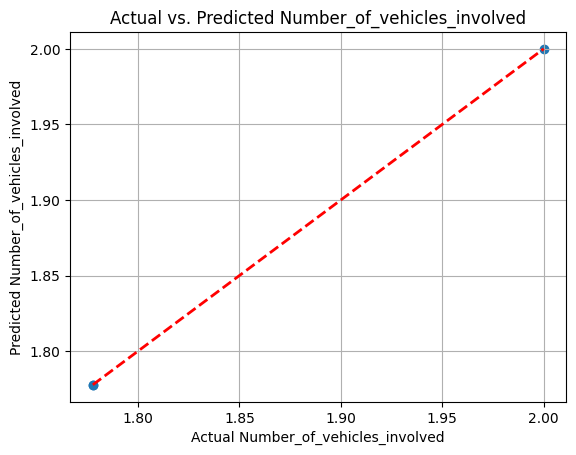

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib

# Read data from CSV file
df = pd.read_csv('/content/new.csv')

# Use SimpleImputer to fill NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')
df['Number_of_casualties'] = imputer.fit_transform(df[['Number_of_casualties']])
df['Number_of_vehicles_involved'] = imputer.fit_transform(df[['Number_of_vehicles_involved']])

# Drop rows with NaN values
df = df.dropna(subset=['Number_of_casualties', 'Number_of_vehicles_involved'])

# Specify the dependent variable (Number_of_vehicles_involved) and independent variables
X = df[['Number_of_casualties']]
y = df['Number_of_vehicles_involved']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Save the model for future use
joblib.dump(model, 'linear_regression_model.pkl')

# Use the trained model to predict Number_of_vehicles_involved for a hypothetical scenario
hypothetical_data = [[2]]  # Assuming Number_of_casualties = 2
predicted_vehicles_involved = model.predict(hypothetical_data)

print(f'Hypothetical Data: {hypothetical_data}')
print(f'Predicted Number_of_vehicles_involved: {predicted_vehicles_involved[0]}')

# Plot actual vs. predicted values
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Regression line
plt.xlabel('Actual Number_of_vehicles_involved')
plt.ylabel('Predicted Number_of_vehicles_involved')
plt.title('Actual vs. Predicted Number_of_vehicles_involved')
plt.grid(True)  # Add grid lines
plt.show()
